In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_visible():
    cap_visible = cv2.VideoCapture('/dev/camera/oCamS-1CGN-U')
    cap_visible.set(cv2.CAP_PROP_CONVERT_RGB, 0)
    if not cap_visible.isOpened():
        print('😡 FailedToOpenError')
    else:
        ret, frame = cap_visible.read()
        if not ret:
            print('😡 FailedToReadFrameError')
        else:
            r_frame, l_frame = cv2.split(frame)  # only left
            l_frame = cv2.cvtColor(l_frame, cv2.COLOR_BAYER_GB2RGB)[60:420, 80:560, :]
            l_frame = cv2.resize(l_frame, (160, 120))
            l_frame = cv2.flip(l_frame, 0)
    cap_visible.release()
    return l_frame


def get_thermal():
    cap_thermal = cv2.VideoCapture('/dev/camera/ThermoCam160B')
    cap_thermal.set(cv2.CAP_PROP_CONVERT_RGB, 0)
    cap_thermal.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter.fourcc('Y', '1', '6', ' '))
    if not cap_thermal.isOpened():
        print('😡 FailedToOpenError')
    else:
        ret, frame = cap_thermal.read()
        if not ret:
            print('😡 FailedToReadFrameError')
        else:
            frame = frame / 65535.0
            frame = (frame - np.min(frame)) / (np.max(frame) - np.min(frame))
            frame = cv2.flip(frame, 0)
            frame = plt.cm.plasma(frame)
            frame = frame[:, :, :3]
            frame = frame[:, :, ::-1]
            frame = (frame * 255.0).astype(np.uint8)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cap_thermal.release()
    return frame


def show_images(visible_img, thermal_img):
    if visible_img.shape != thermal_img.shape:
        print('😡 ImageShapeNotSameError')
    print(visible_img.shape, thermal_img.shape)
    concat = cv2.hconcat([visible_img, thermal_img])
    _ = plt.figure(figsize=(20, 40))
    _ = plt.imshow(concat, cmap='gray')

(120, 160, 3) (120, 160, 3)


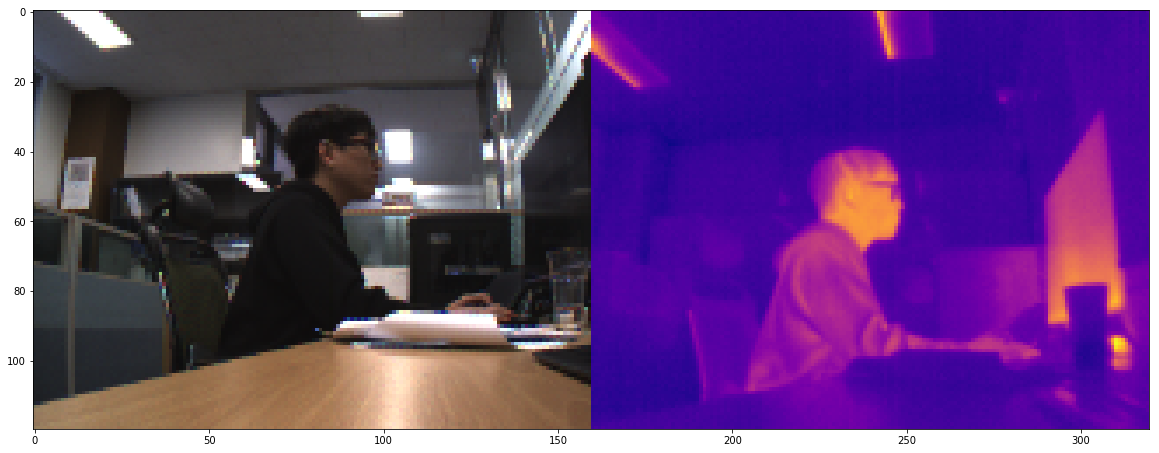

In [8]:
visible_rgb = get_visible()
thermal_rgb = get_thermal()

show_images(visible_rgb, thermal_rgb)

(120, 160) (120, 160)


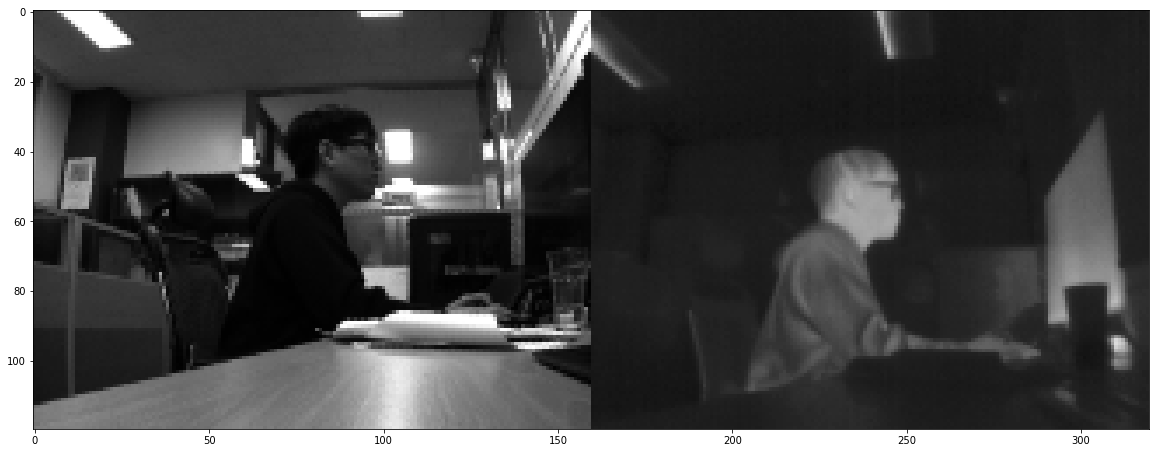

In [9]:
visible = cv2.cvtColor(visible_rgb, cv2.COLOR_RGB2GRAY)
thermal = cv2.cvtColor(thermal_rgb, cv2.COLOR_RGB2GRAY)

show_images(visible, thermal)

(120, 160) (120, 160)


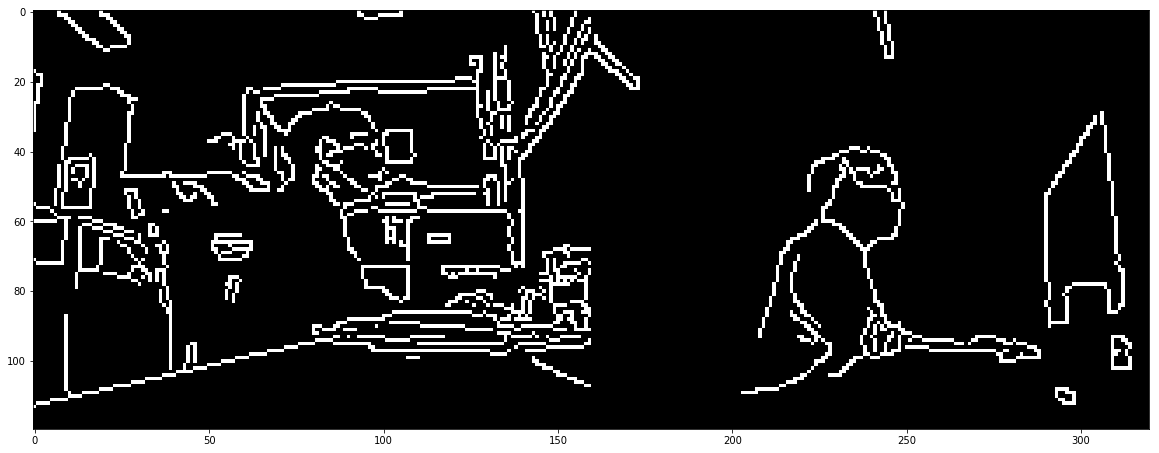

In [10]:
def canny(visible, thermal):
    min_thres, max_thres = 60, 200
    visible = cv2.Canny(visible, min_thres, max_thres)
    thermal = cv2.Canny(thermal, min_thres, max_thres)
    return visible, thermal

visible_canny, thermal_canny = canny(visible, thermal)
show_images(visible_canny, thermal_canny)

(120, 160) (120, 160)


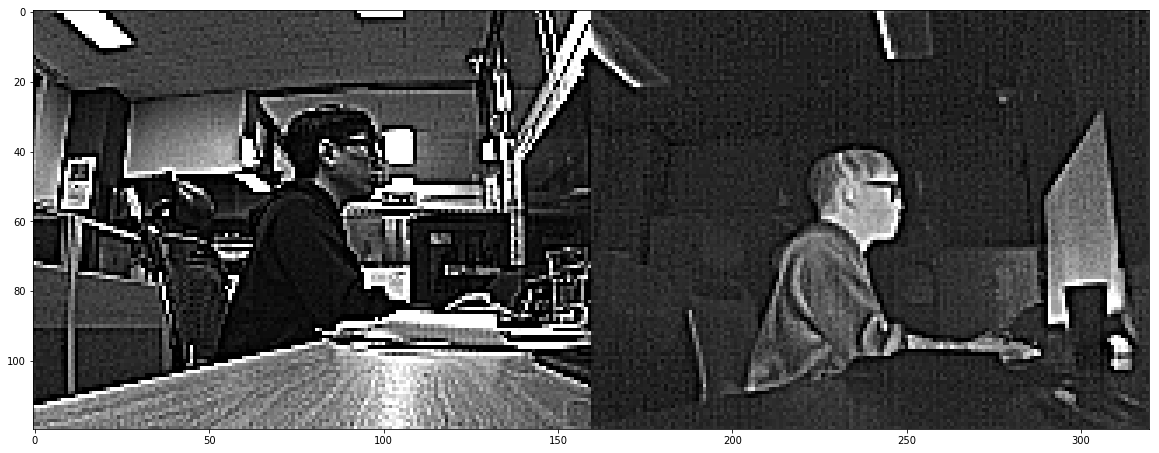

In [11]:
def sharp(visible, thermal):
    mask = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    visible = cv2.filter2D(visible, -1, mask)
    thermal = cv2.filter2D(thermal, -1, mask)
    return visible, thermal

visible_sharp, thermal_sharp = sharp(visible, thermal)
show_images(visible_sharp, thermal_sharp)

(120, 160) (120, 160)


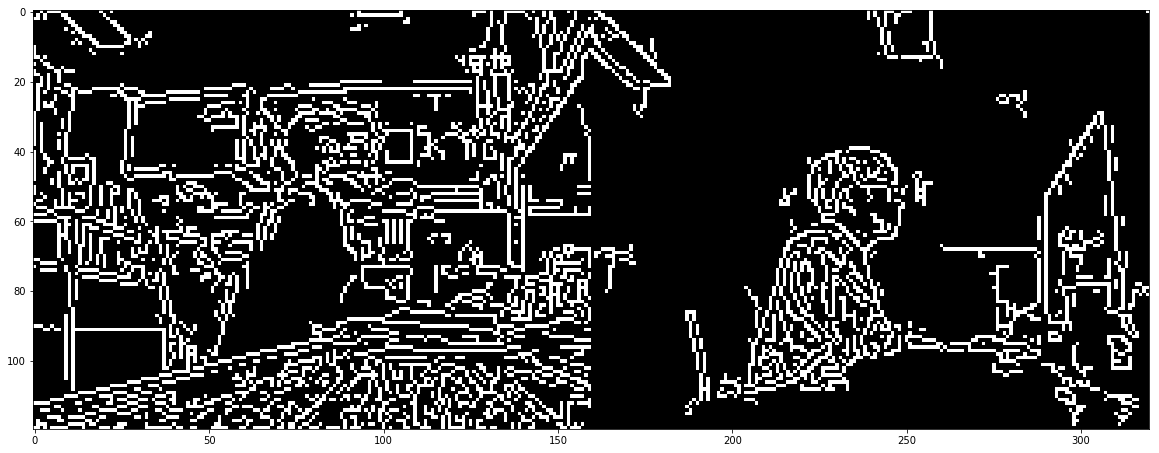

In [12]:
visible_sharp_canny, thermal_sharp_canny = canny(visible_sharp, thermal_sharp)
show_images(visible_sharp_canny, thermal_sharp_canny)

(120, 160) (120, 160)


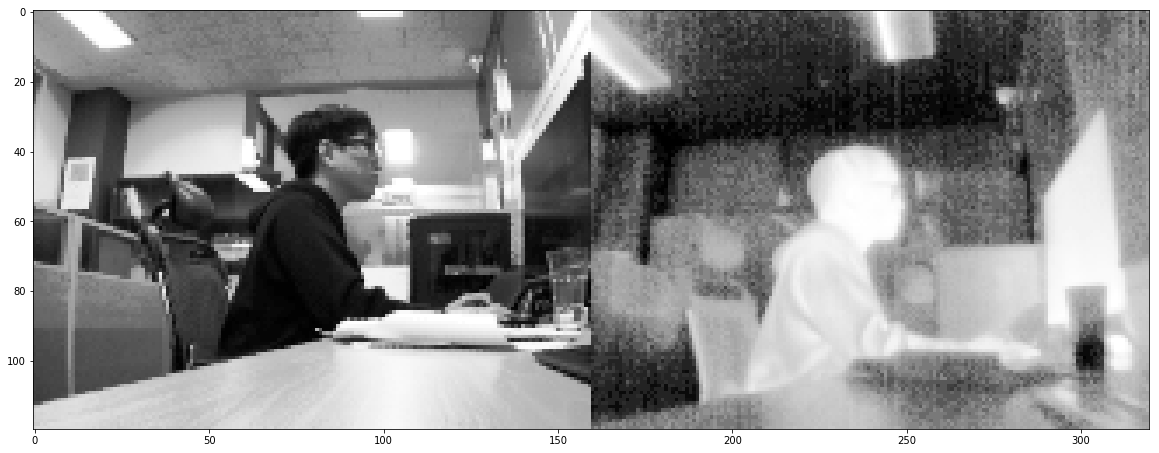

In [13]:
def equal_hist(visible, thermal):
    visible = cv2.equalizeHist(visible)
    thermal = cv2.equalizeHist(thermal)
    return visible, thermal

visible_hist, thermal_hist = equal_hist(visible, thermal)
show_images(visible_hist, thermal_hist)

(120, 160) (120, 160)


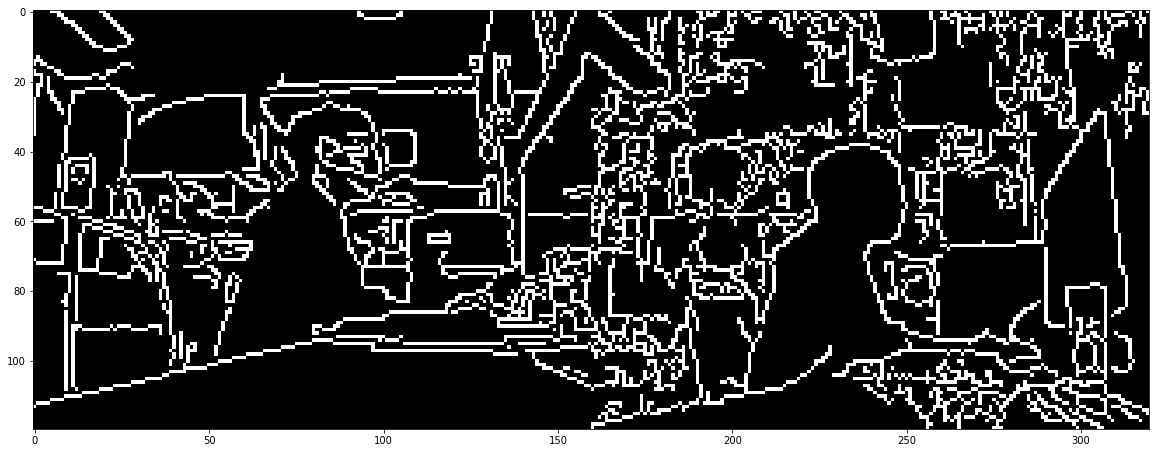

In [14]:
visible_hist_canny, thermal_hist_canny = canny(visible_hist, thermal_hist)
show_images(visible_hist_canny, thermal_hist_canny)

(120, 160) (120, 160)


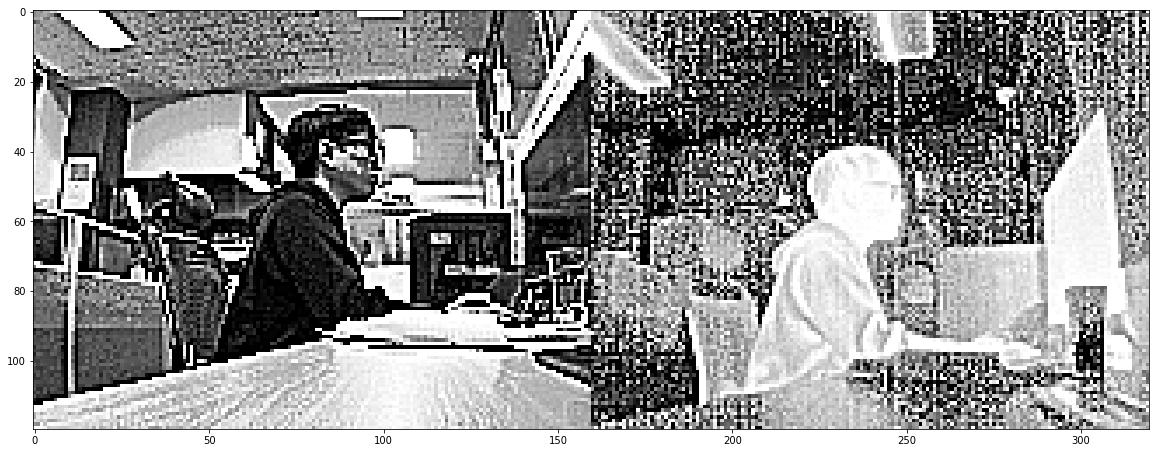

In [15]:
visible_hist_sharp, thermal_hist_sharp = sharp(visible_hist, thermal_hist)
show_images(visible_hist_sharp, thermal_hist_sharp)

(120, 160) (120, 160)


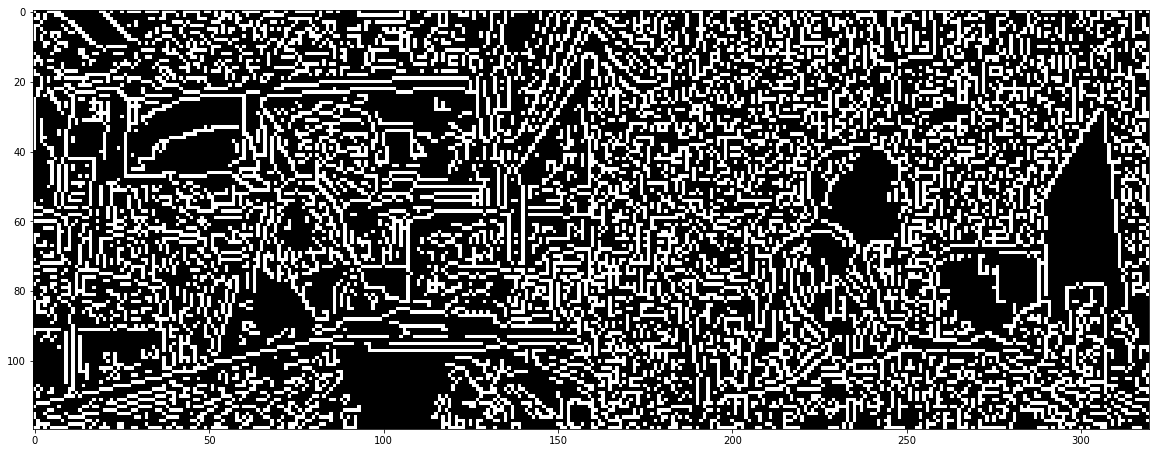

In [16]:
visible_hist_sharp_canny, thermal_hist_sharp_canny = canny(visible_hist_sharp, thermal_hist_sharp)
show_images(visible_hist_sharp_canny, thermal_hist_sharp_canny)

(120, 160) (120, 160)


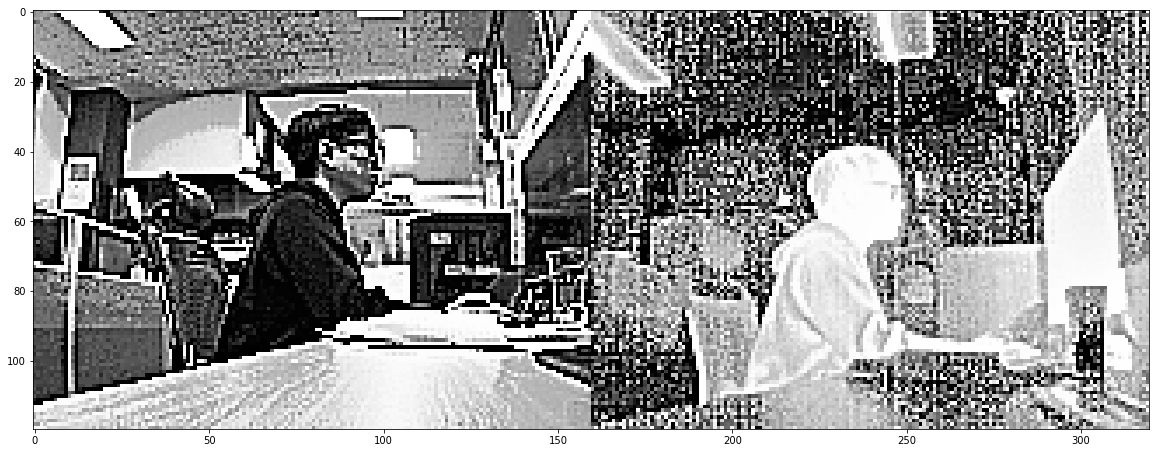

In [17]:
def bilateral(visible, thermal):
    d, sigma_color, sigma_space = -1, 10, 5
    visible = cv2.bilateralFilter(visible, d, sigma_color, sigma_space)
    thermal = cv2.bilateralFilter(thermal, d, sigma_color, sigma_space)
    return visible, thermal

visible_hist_sharp_bi, thermal_hist_sharp_bi = bilateral(visible_hist_sharp, thermal_hist_sharp)
show_images(visible_hist_sharp_bi, thermal_hist_sharp_bi)